<a href="https://colab.research.google.com/github/aplneto/IF702/blob/master/mini_project01_cnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot
from tensorflow.python.keras.callbacks import History

%matplotlib inline

def plot_history(history: dict):
  pyplot.plot(list(range(len(history['accuracy']))), history['accuracy'], label='accuracy', color='red')
  pyplot.plot(list(range(len(history['precision']))), history['precision'], label='precision', color='green')
  pyplot.plot(list(range(len(history['recall']))), history['recall'], label='recall', color='blue')
  pyplot.legend()
  pyplot.title("Model Report")

In [ ]:
import numpy as np

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_x, train_y), (test_x, test_y) = mnist.load_data()

num_classes = len(set(train_y))

# train_X = train_x.reshape(-1, 28, 28, 1).astype('float32')
# test_X = test_x.reshape(-1, 28, 28, 1).astype('float32')

train_X = train_x.astype('float32') / 255
test_X = test_x.astype('float32') / 255

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import tensorflow
from sklearn.model_selection import train_test_split

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)

# Training settings

INPUT_SHAPE = train_X.shape[1:]
EPOCHS = 60
BATCH_SIZE = 10
LEARNING_RATE = 0.01
SGD = tensorflow.keras.optimizers.SGD(learning_rate=LEARNING_RATE)


In [ ]:
# Implementação de callback para teste ao fim de cada época

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

class EpochTestCallback(tensorflow.keras.callbacks.Callback):
  def __init__(self, test_sample: np.ndarray, test_label: np.ndarray):
    self.test_X = test_sample
    self.test_Y = test_label
    self.metrics = {
        'accuracy': [],
        'precision': [],
        'recall': []
    }

  def on_epoch_end(self, epoch, logs=None):
    predictions = self.model.predict(self.test_X)
    y_test = np.argmax(self.test_Y, axis=-1)
    predictions = np.argmax(predictions, axis=-1)
    a = accuracy_score(self.test_Y, predictions)
    self.metrics['accuracy'].append(a)
    p = precision_score(self.test_Y, predictions, average='weighted')
    self.metrics['precision'].append(p)
    r = recall_score(self.test_Y, predictions, average='macro')
    self.metrics['recall'].append(r)

    print("Métricas para o conjunto de testes:\tAcurácia: {0}\tPrecisão: {1}\tRecall: {2}\n".format(a, p, r))

    self.__last_predictions = predictions
  
  def on_train_end(self, logs=None):
     plot_history(self.metrics)
     predictions = np.argmax(self.model.predict(test_X, batch_size=10000), axis=-1)
     print(classification_report(self.test_Y, predictions))
    
  def on_train_begin(self, logs=None):
    self.metrics = {
        'accuracy': [],
        'precision': [],
        'recall': []
    }

callback_list = [EpochTestCallback(test_X, test_y)]

## Modelo 1
$ \eta = 0.1 $

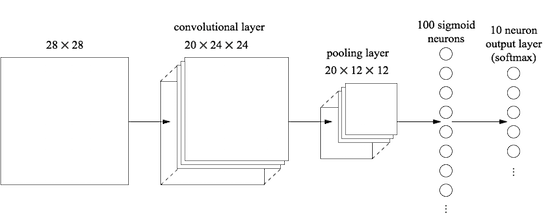

In [ ]:
from tensorflow.keras import Sequential

model = Sequential()

# Input layer: Cada imagem tem 28x28 pixels
model.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))

# Camada de convolução
model.add(tensorflow.keras.layers.Conv2D(filters=20, kernel_size=(5, 5)))

# Camada de pooling
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Camada com 100 neurônios sigmoid
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(num_classes * 10, activation='sigmoid'))

# Camada com 10 neurônios softmax
model.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(metrics=[
  'accuracy', 'Precision', 'Recall'
], optimizer=SGD, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               288100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
_________________________________________________________________


Epoch 1/60
4800/4800 [==============================] - 40s 8ms/step - loss: 0.0903 - accuracy: 0.1457 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0889 - val_accuracy: 0.1954 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.2092	Precisão: 0.3039032229119166	Recall: 0.19450385461643455

Epoch 2/60
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0876 - accuracy: 0.3020 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0859 - val_accuracy: 0.4399 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.4701	Precisão: 0.6400465430689044	Recall: 0.4586668316244215

Epoch 3/60
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0819 - accuracy: 0.5012 - precision: 1.0000 - recall: 2.0833e-05 - val_loss: 0.0757 - val_accuracy: 0.5588 - val_precision: 1.0000 - val_recall: 5.8333e-04
Métricas para o conjunto de testes:	Acurácia: 0.5795	Preci

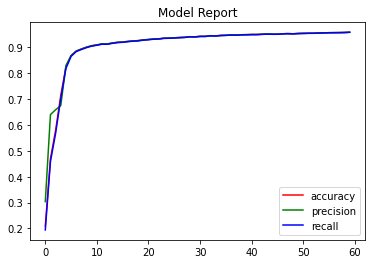

In [ ]:
history = model.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(valid_X, valid_label), callbacks = callback_list)

## Modelo 2

* What classification accuracy do you get if you omit the fully-connected layer, and just use the convolutional-pooling layer and softmax layer? Does the inclusion of the fully-connected layer help?

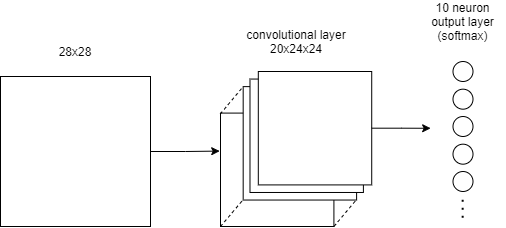

In [ ]:
model2 = Sequential()

model2.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))
model2.add(tensorflow.keras.layers.Conv2D(filters=20, kernel_size=(5, 5)))
model2.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Camada com 10 neurônios softmax
model2.add(tensorflow.keras.layers.Flatten())
model2.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model2.compile(metrics=[
  'accuracy', 'Precision', 'Recall'
], optimizer=SGD, loss='mean_squared_error')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                28810     
Total params: 29,330
Trainable params: 29,330
Non-trainable params: 0
_________________________________________________________________


Epoch 1/60
4800/4800 [==============================] - 33s 7ms/step - loss: 0.0785 - accuracy: 0.4315 - precision: 0.9938 - recall: 0.0434 - val_loss: 0.0502 - val_accuracy: 0.7288 - val_precision: 0.9837 - val_recall: 0.3069
Métricas para o conjunto de testes:	Acurácia: 0.7403	Precisão: 0.6794035093454969	Recall: 0.7297840947597497

Epoch 2/60
4800/4800 [==============================] - 32s 7ms/step - loss: 0.0308 - accuracy: 0.8271 - precision: 0.9577 - recall: 0.6299 - val_loss: 0.0219 - val_accuracy: 0.8672 - val_precision: 0.9429 - val_recall: 0.7817
Métricas para o conjunto de testes:	Acurácia: 0.88	Precisão: 0.8811470015186674	Recall: 0.8776883855567901

Epoch 3/60
4800/4800 [==============================] - 32s 7ms/step - loss: 0.0195 - accuracy: 0.8811 - precision: 0.9404 - recall: 0.8159 - val_loss: 0.0177 - val_accuracy: 0.8865 - val_precision: 0.9371 - val_recall: 0.8378
Métricas para o conjunto de testes:	Acurácia: 0.8971	Precisão: 0.8976094556786333	Recall: 0.895466794

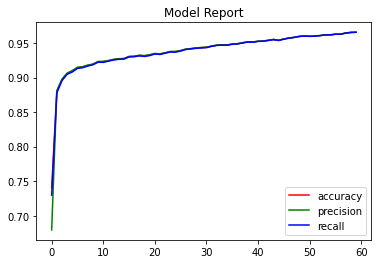

In [ ]:
history = model2.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(valid_X, valid_label), callbacks = callback_list)

# Modelo 3

* Adicionar uma segunda camada de convolução

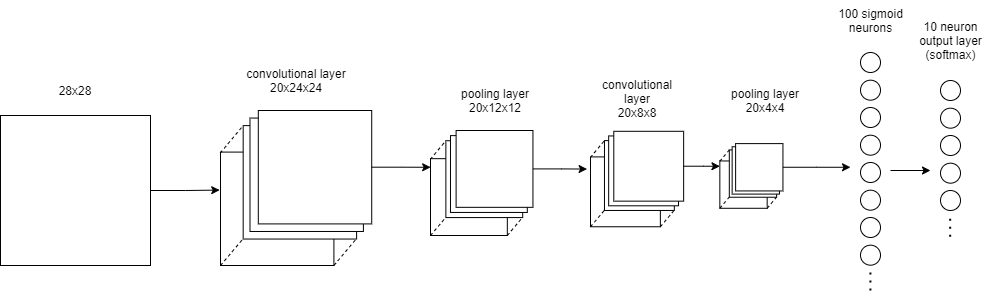

In [ ]:
model3 = Sequential()

# Input layer: Cada imagem tem 28x28 pixels
model3.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))

# Camada de convolução
model3.add(tensorflow.keras.layers.Conv2D(filters=20, kernel_size=(5, 5)))

# Camada de pooling
model3.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Segunda camada de convolução
model3.add(tensorflow.keras.layers.Conv2D(filters=20, kernel_size=(5, 5)))

# Segunda camada de pooling
model3.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Camada com 100 neurônios sigmoid
model3.add(tensorflow.keras.layers.Flatten())
model3.add(tensorflow.keras.layers.Dense(num_classes * 10, activation='sigmoid'))

# Camada com 10 neurônios softmax
model3.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model3.compile(metrics=[
  'accuracy', 'Precision', 'Recall'
], optimizer=SGD, loss='mean_squared_error')

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               32100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

Epoch 1/60
4800/4800 [==============================] - 50s 10ms/step - loss: 0.0903 - accuracy: 0.1547 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0893 - val_accuracy: 0.1847 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.1877	Precisão: 0.29141797557566523	Recall: 0.17419009330792276

Epoch 2/60
4800/4800 [==============================] - 50s 10ms/step - loss: 0.0886 - accuracy: 0.2233 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0876 - val_accuracy: 0.2692 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.2737	Precisão: 0.4099022457420734	Recall: 0.2609330696673296

Epoch 3/60
4800/4800 [==============================] - 50s 10ms/step - loss: 0.0853 - accuracy: 0.3254 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0816 - val_accuracy: 0.3783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 

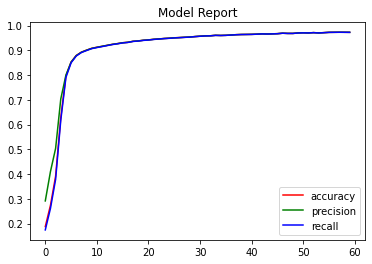

In [ ]:
history = model3.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(valid_X, valid_label), callbacks = callback_list)

# Modelo 4
* Adicionar uma segunda camada totalmente conectada a rede

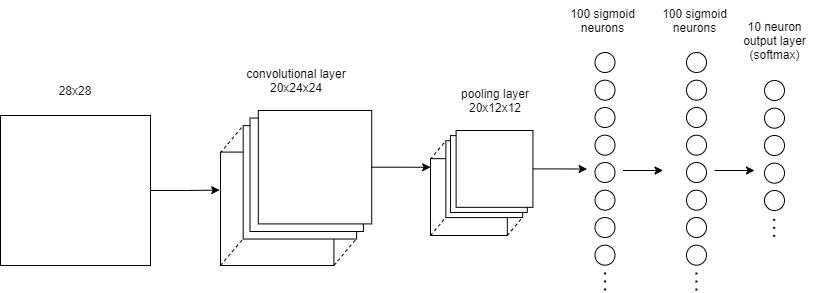

In [ ]:
model4 = Sequential()

# Input layer: Cada imagem tem 28x28 pixels
model4.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))

# Camada de convolução
model4.add(tensorflow.keras.layers.Conv2D(filters=20, kernel_size=(5, 5)))

# Camada de pooling
model4.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Camada com 100 neurônios sigmoid
model4.add(tensorflow.keras.layers.Flatten())
model4.add(tensorflow.keras.layers.Dense(num_classes * 10, activation='sigmoid'))
model4.add(tensorflow.keras.layers.Dense(num_classes * 10, activation='sigmoid'))

# Camada com 10 neurônios softmax
model4.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model4.compile(metrics=[
  'accuracy', 'Precision', 'Recall'
], optimizer=SGD, loss='mean_squared_error')

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               288100    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 299,730
Trainable params: 299,730
Non-trainable params: 0
________________________________________________

Epoch 1/60
4800/4800 [==============================] - 44s 9ms/step - loss: 0.0909 - accuracy: 0.1121 - precision: 0.1128 - recall: 4.5833e-04 - val_loss: 0.0899 - val_accuracy: 0.1106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.1135	Precisão: 0.01288225	Recall: 0.1

Epoch 2/60
4800/4800 [==============================] - 42s 9ms/step - loss: 0.0899 - accuracy: 0.1128 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0898 - val_accuracy: 0.1106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.1135	Precisão: 0.01288225	Recall: 0.1

Epoch 3/60
4800/4800 [==============================] - 42s 9ms/step - loss: 0.0898 - accuracy: 0.1128 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0898 - val_accuracy: 0.1106 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Métricas para o conjunto de testes:	Acurácia: 0.1135	Precisão: 0.01288225	Recall: 0.1

Epoch 4/60
480

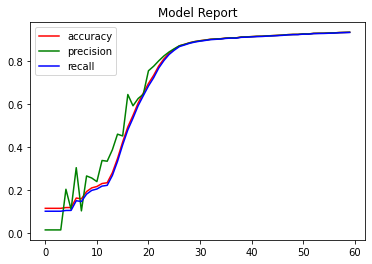

In [ ]:
history = model4.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(valid_X, valid_label), callbacks = callback_list)

# Modelo 5
* Função de ativação ReLU nas camadas de convolução e sigmoid

In [ ]:
model5 = Sequential()

# Input layer: Cada imagem tem 28x28 pixels
model5.add(tensorflow.keras.layers.InputLayer(INPUT_SHAPE))

# Camada de convolução
model5.add(tensorflow.keras.layers.Conv2D(filters=20, kernel_size=(5, 5)))

# Camada de pooling
model5.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Camada com 100 neurônios sigmoid
model5.add(tensorflow.keras.layers.Flatten())
model5.add(tensorflow.keras.layers.Dense(num_classes * 10, activation='relu'))

# Camada com 10 neurônios softmax
model5.add(tensorflow.keras.layers.Dense(num_classes, activation='softmax'))

model5.compile(metrics=[
  'accuracy', 'Precision', 'Recall'
], optimizer=SGD, loss='mean_squared_error')

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               288100    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
_________________________________________________________________


Epoch 1/60
4800/4800 [==============================] - 40s 8ms/step - loss: 0.0063 - accuracy: 0.9635 - precision: 0.9781 - recall: 0.9498 - val_loss: 0.0069 - val_accuracy: 0.9572 - val_precision: 0.9726 - val_recall: 0.9424
Métricas para o conjunto de testes:	Acurácia: 0.9598	Precisão: 0.9598327621751125	Recall: 0.959388065071278

Epoch 2/60
4800/4800 [==============================] - 40s 8ms/step - loss: 0.0062 - accuracy: 0.9636 - precision: 0.9782 - recall: 0.9496 - val_loss: 0.0069 - val_accuracy: 0.9577 - val_precision: 0.9727 - val_recall: 0.9427
Métricas para o conjunto de testes:	Acurácia: 0.9601	Precisão: 0.9601093859670217	Recall: 0.9597288397098774

Epoch 3/60
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0062 - accuracy: 0.9636 - precision: 0.9785 - recall: 0.9500 - val_loss: 0.0068 - val_accuracy: 0.9579 - val_precision: 0.9726 - val_recall: 0.9433
Métricas para o conjunto de testes:	Acurácia: 0.9601	Precisão: 0.9601176298173694	Recall: 0.95972697

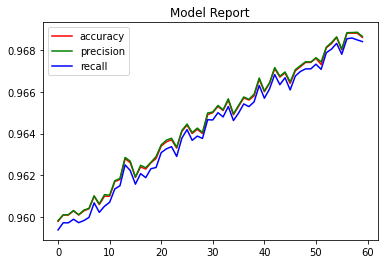

In [15]:
history = model4.fit(train_X, train_label, batch_size = BATCH_SIZE, epochs=EPOCHS, validation_data=(valid_X, valid_label), callbacks = callback_list)